In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import numpy as np
import scipy as sp
from funimag import superpixel_analysis as sup
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("ticks")
%matplotlib inline
%load_ext autoreload
%autoreload 2
fish_path = os.path.abspath(os.path.join('..'))
if fish_path not in sys.path:
    sys.path.append(fish_path)
from utils.demix import recompute_nmf
import pickle

## 1. Load denoised data

In [2]:
dat_ = np.load('tmpData/Y_denoised_svd.npz')
Y_amp = dat_['Y_amp']
Y_ave = dat_['Y_ave']
Y_svd = dat_['Y_svd']
ave_trend = dat_['ave_trend']
mov = Y_svd * Y_amp

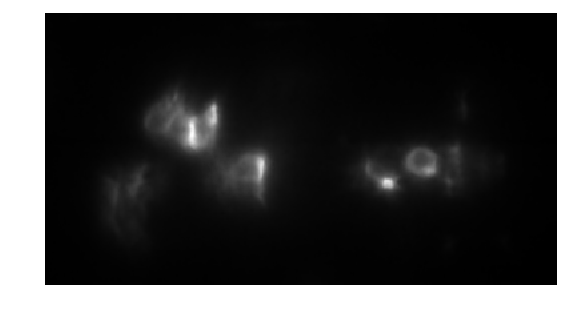

In [3]:
plt.figure(figsize=(15,5))
plt.imshow(ave_trend.mean(axis=-1), cmap=plt.cm.gray)
plt.axis('off')
plt.show()

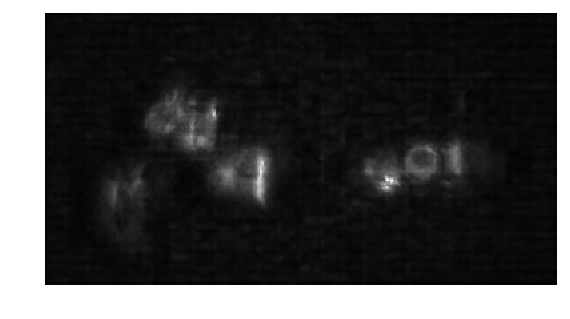

In [56]:
plt.figure(figsize=(15,5))
plt.imshow(mov.max(axis=-1), cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [4]:
from trefide.extras.util_plot import correlation_pnr
mov_ = mov + np.random.normal(size=Y_svd.shape)*0.7
Cn, _ = correlation_pnr(-mov_, gSig=None, remove_small_val=False, remove_small_val_th=3, center_psf=False)

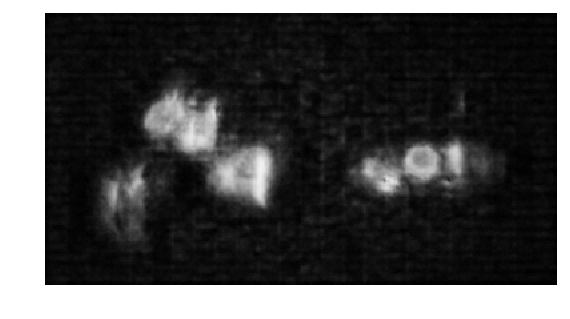

In [5]:
plt.figure(figsize=(15,5))
plt.imshow(Cn, vmin=0, vmax=1.0, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

## 2. Demixing pipeline on raw data

In [6]:
# mov_ = mov + np.random.normal(size=Y_svd.shape)*0.7
# pass_num = 3
# rlt_= sup.demix_whole_data(-mov_, cut_off_point=[0.6,0.6,0.5,0.4], length_cut=[25,25,25,25], th=[2,1,1,1], 
#                            pass_num=pass_num, residual_cut = [0.6,0.6,0.6, 0.6], corr_th_fix=0.3, 
#                            max_allow_neuron_size=0.2, merge_corr_thr=0.5, merge_overlap_thr=0.8, 
#                            num_plane=1, patch_size=[50, 50], plot_en=False, TF=False, fudge_factor=1, 
#                            text=False, bg=False, max_iter=60, max_iter_fin=100, update_after=4)
# # with open('tmpData/Y_demix_rlt.pkl', 'wb') as file_:
# #     pickle.dump(rlt_, file_)

In [7]:
with open('tmpData/Y_demix_rlt.pkl', 'rb') as f:
    rlt_ = pickle.load(f)

In [8]:
d1, d2, _ = mov.shape
sup_pix = np.zeros((d1, d2))
pass_num = 3
max_cp = 0
for n_pass in range(pass_num):
    sup_ = rlt_["superpixel_rlt"][n_pass]["connect_mat_1"]
    sup_pix[sup_>0] = sup_[sup_>0] + max_cp
    max_cp = max_cp + sup_.max()

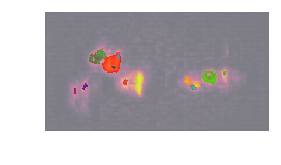

In [9]:
plt.figure(figsize=(4, 3))
plt.imshow(Cn, vmin=0, vmax=1.0)
plt.imshow(sup_pix, cmap=plt.cm.nipy_spectral_r, alpha=0.6)
plt.axis('off')
plt.show()

In [87]:
import matplotlib.colors as mcolors
colors_ = plt.cm.nipy_spectral_r(range(200))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors_)

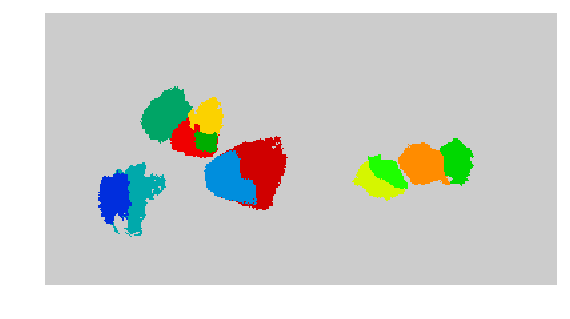

In [135]:
# pass_num = 3
# for n_pass in range(pass_num):
#     sup.pure_superpixel_single_plot(rlt_["superpixel_rlt"][n_pass]["connect_mat_1"],
#                                     rlt_["superpixel_rlt"][n_pass]["unique_pix"],
#                                     rlt_["superpixel_rlt"][n_pass]["brightness_rank_sup"],
#                                     text=True,
#                                     pure=False);
#     plt.show()
A = rlt_['fin_rlt']['a']
A_ = A[:, (A>0).sum(axis=0)>0] # min pixel = 40
A_comp = np.zeros(A_.shape[0])
A_comp[A_.sum(axis=-1)>0] = np.argmax(A_[A_.sum(axis=-1)>0, :], axis=-1) + 1
A_comp[A_comp==3]=100
A_comp[A_comp==6]=3
A_comp[A_comp==100]=6
d1, d2, _ = mov.shape
plt.figure(figsize=(15,5))
# plt.imshow(ave_trend[:, :, 0], cmap=plt.cm.gray)
plt.imshow(A_comp.reshape(d2, d1).T, cmap=mymap, alpha=1.0)
# plt.title('Components')
plt.axis('off')
plt.savefig('example_component.eps')

In [89]:
C_, b_, res_ = recompute_nmf(rlt_=rlt_, mov=-mov)

### 2.1 Generate movie

In [13]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# from matplotlib import animation
# from matplotlib.animation import FFMpegFileWriter

# mov_detrend = -np.load('tmpData/Y_detr.npy')
# mov_denoise = -(Y_svd * Y_amp + Y_ave)
# mov_noise = mov_detrend - mov_denoise

# A_ = rlt_['fin_rlt']['a']
# mov_signal = np.matmul(A_, C_).reshape(mov.shape, order='F')
# mov_background = b_
# mov_res = res_

In [14]:
# movs = [mov_detrend, mov_denoise, mov_signal, mov_background, mov_res, mov_noise]
# titles = ['Detrend', 'Denoised', 'Signal', 'Background', 'Residual', 'Noise']

In [15]:
# max_ = [_.max() for _ in movs]
# min_ = [_.min() for _ in movs]

In [16]:
# max_[1] = 1*3
# min_[1] = -1
# max_[4] = 0.6*3
# min_[4] = -0.6

In [17]:
# fig, axs = plt.subplots(1,6, figsize=(12, 4))
# # for n_, nax in enumerate(ax):
# #     nax.imshow(movs[n_][:, :, 0].T, vmax = max_, vmin = min_, cmap=plt.cm.gray)
# #     nax.set_axis_off()
# #     nax.set_title(titles[n_])
# # plt.show()

# for mdx in range(6):
#     axs[mdx].set(title=titles[mdx])
#     axs[mdx].title.set_fontsize(15)
#     axs[mdx].title.set_fontweight("bold")
#     if mdx>0:
#         axs[mdx].set_axis_off()
#         axs[mdx].set_xticklabels([])
#         axs[mdx].set_yticklabels([])
# axs[5].set(title=titles[5] + " Frame: {}".format(0))
# axs[5].title.set_fontsize(15)
# axs[5].title.set_fontweight("bold")
# plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)

# axs[2].imshow(A_comp.reshape(d2, d1), cmap=plt.cm.nipy_spectral_r)
# imgs = [ax.imshow(movs[mdx][:,:, 0].T, vmin=min_[mdx], vmax=max_[mdx], cmap="Greys_r") for mdx, ax in enumerate(axs)]
# imgs[2].set_alpha(0.8)

In [18]:
# def update(i):
#     for mdx in [0, 1, 2, 4, 5]:
#         imgs[mdx].set_data(movs[mdx][:,:,i].T);
#     axs[5].set(title=titles[5] + " Frame: {}".format(i))
#     axs[5].title.set_fontsize(15)
#     axs[5].title.set_fontweight("bold")
#     return imgs

# num_frames = mov.shape[-1]
# fps = 30
# filename = 'tmpMovie/02212018Fish2-1.mp4'
# ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=True);
# mywriter = FFMpegFileWriter(fps=25,codec="h264")
# ani.save(filename, writer=mywriter)

#### 2.1.1 movie without raw image

In [19]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# from matplotlib import animation
# from matplotlib.animation import FFMpegFileWriter

In [20]:
# A_ = rlt_['fin_rlt']['a']
# mov_signal = np.matmul(A_, C_).reshape(mov.shape, order='F')
# mov_background = b_
# mov_res = res_
# movs = [mov_signal, mov_background, mov_res]
# titles = ['Signal', 'Background', 'Residual']

In [21]:
# max_ = [np.percentile(_, 99.5) for _ in movs]
# min_ = [np.percentile(_, 0.5) for _ in movs]

# fig, axs = plt.subplots(1,3, figsize=(12, 3))

# axs = axs.flatten()

# for mdx in range(3):
#     axs[mdx].set(title=titles[mdx])
#     axs[mdx].title.set_fontsize(15)
#     axs[mdx].title.set_fontweight("bold")
#     axs[mdx].set_axis_off()
#     axs[mdx].set_xticklabels([])
#     axs[mdx].set_yticklabels([])
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.05, hspace=0)

# axs[0].imshow(A_comp.reshape(d2, d1).T, cmap=plt.cm.nipy_spectral_r)
# imgs = [ax.imshow(movs[mdx][:,:, 0], vmin=min_[mdx], vmax=max_[mdx], cmap="Greys_r") for mdx, ax in enumerate(axs)]
# imgs[0].set_alpha(0.8)

In [22]:
# def update(i):
#     for mdx in [0, 2]:
#         imgs[mdx].set_data(movs[mdx][:,:,i]);
#     return imgs

# num_frames = mov.shape[-1]
# fps = 60
# filename = 'tmpMovie/02212018Fish2-1_demix.mp4'
# ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=True);
# mywriter = FFMpegFileWriter(fps=fps,codec="h264")
# ani.save(filename, writer=mywriter)

#### 2.1.2 movie with signal only

In [90]:
mov_signal = np.matmul(A_, C_).reshape(mov.shape, order='F')
mov_signal -= mov_signal.min(axis=-1, keepdims=True)

In [108]:
max_ = np.percentile(mov_signal, 99.9)
min_ = np.percentile(mov_signal, 0.1)

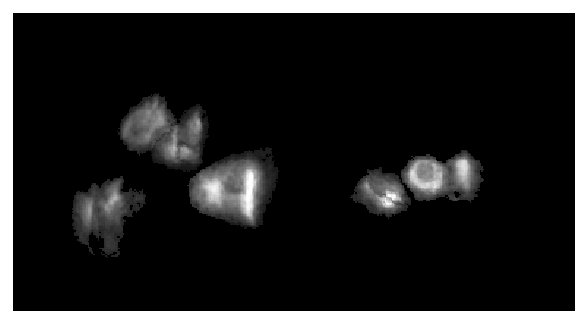

In [116]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import animation
from matplotlib.animation import FFMpegFileWriter
fig, axs = plt.subplots(figsize=(8.5,5))
axs.set_axis_off()
axs.set_xticklabels([])
axs.set_yticklabels([])
plt.tight_layout()
imgs = axs.imshow(mov_signal[:,:, 0], vmin=min_, vmax=max_, cmap="Greys_r")

In [117]:
def update(i):
    imgs.set_data(mov_signal[:,:,i]);
    return imgs,

num_frames = 3000
fps = 60
filename = 'tmpMovie/02212018Fish2-1_demix_signal.mp4'
ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=True);
mywriter = FFMpegFileWriter(fps=fps,codec="h264")
ani.save(filename, writer=mywriter)

In [113]:
indx = np.where((A_[:,5]>0).reshape(d2, d1)>0)
indx[0].min(), indx[0].max(), indx[1].min(), indx[1].max()

(265, 304, 97, 128)

In [119]:
from utils.demix import recompute_C_matrix
base_ = recompute_C_matrix(ave_trend, A_)

In [137]:
voltr_ = C_[5,:]/(C_[5,:].mean()+base_[5]-100)

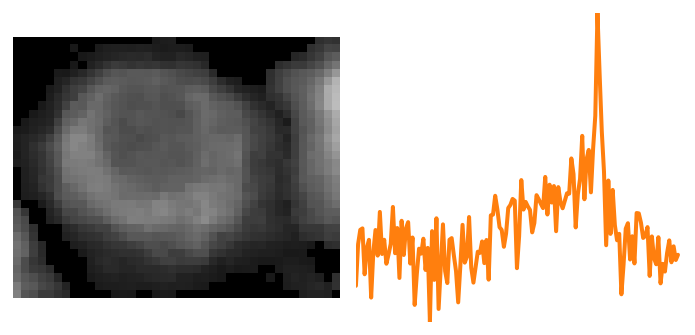

In [180]:
sns.color_palette("muted")
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs = axs.flatten()
for n in range(2):
    axs[n].set_axis_off()
    axs[n].set_xticklabels([])
    axs[n].set_yticklabels([])
axs[1].set_ylim([-0.013, 0.0885])
axs[1].set_xlim([0, 150])
plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
imgs = []
imgs.append(axs[0].imshow(mov_signal[97:129, 265:305, 0], vmin=min_, vmax=max_, cmap="Greys_r"))
im = axs[1].plot(range(150), voltr_[350:500], 'tab:orange', lw=4.0)
imgs.append(im[0])

def update(i):
    imgs[0].set_data(mov_signal[97:129, 265:305, 350+i-1]);
    imgs[1].set_data(range(i), voltr_[350:350+i]);
    return imgs

num_frames = 150
fps = 25
filename = 'tmpMovie/02212018Fish2-1_demix_cell.mp4'
ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=True);
mywriter = FFMpegFileWriter(fps=fps,codec="h264")
ani.save(filename, writer=mywriter)

## 3. Trend filtering

### 3.0 L1TF without removing spikes

In [181]:
from trefide.temporal import TrendFilter
# voltr_ = C_[5,:]/C_[5,:].mean()-1
# voltr_ = voltr_/50
voltr_ = C_[5,:]/(C_[5,:].mean()+base_[5]-100)

In [182]:
filters = TrendFilter(voltr_.shape[-1])
denoised_voltr = filters.denoise(voltr_)

/groups/ahrens/home/weiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: CPS line search stalled. Returning best solution found.
  


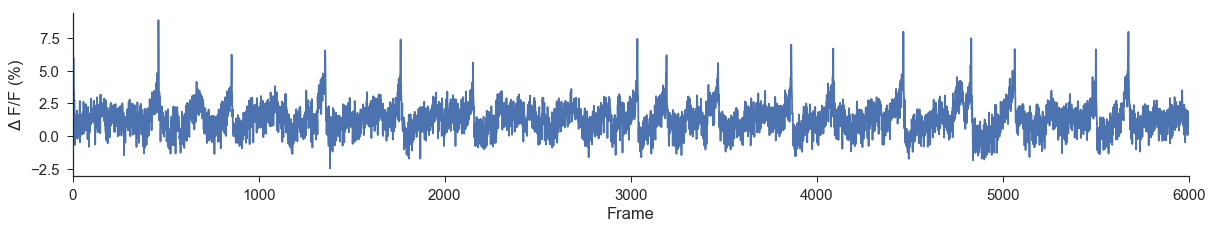

In [184]:
plt.figure(figsize=(20, 3))
plt.plot(voltr_*100)    
# plt.plot(denoised_voltr)
plt.ylabel(r'$\Delta$ F/F (%)')
plt.xlabel('Frame')
plt.xlim([0, 6000])
sns.despine()
# plt.savefig('tmpFigures/example_cell_voltron.eps')

### 3.1 Spike detection

In [185]:
from keras.models import load_model
from spikeDetectionNN.spikeDetector import prepare_sequences
from spikeDetectionNN.utils import detected_peak_spikes, plot_spks
from glob import glob

In [186]:
window_length = 40
trained_model = sorted(glob('tmpData/partly_trained_spikeDetector_20*.h5'))[-1]
m = load_model(trained_model)
spk = np.zeros(voltr_.shape)
x_, contain_outliers_ = prepare_sequences(voltr_, spk, window_length)
spk_ = detected_peak_spikes(m, x_, voltr_, thres=0.85, devoltr_ = denoised_voltr, 
                            peakThres=.9, peak_minDist=10, smallPeakThres = 40)

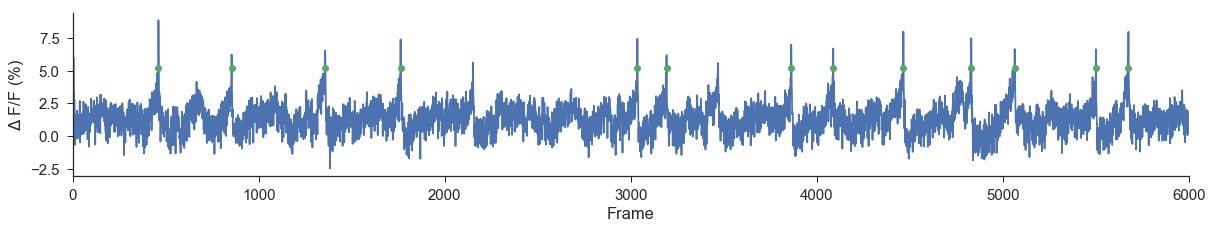

In [187]:
plt.figure(figsize=(20, 3))
plt.plot(voltr_*100)
plot_spks(plt, spk_, 5.2, label='Detected spike time')
plt.xlabel('Frame')
plt.ylabel(r'$\Delta$ F/F (%)')
plt.xlabel('Frame')
plt.xlim([0, 6000])
# plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1))
sns.despine()
# plt.savefig('tmpFigures/example_cell_voltron.eps')

### 3.2 L1TF

In [29]:
tspk = np.where(spk_>0)[0]
tspk_win = tspk[:, None] + np.arange(-3, 3)[None, :]
tspk_win = tspk_win.reshape(-1)
nospike = np.zeros(spk_.shape)
nospike[tspk_win] = 1
tspk_ = np.where(nospike==0)[0]
int_voltr_ = voltr_.copy()
int_voltr_[tspk_win] = np.interp(tspk_win, tspk_, voltr_[tspk_])
denoised_voltr_ = filters.denoise(int_voltr_)

/groups/ahrens/home/weiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: CPS line search stalled. Returning best solution found.
  if __name__ == '__main__':


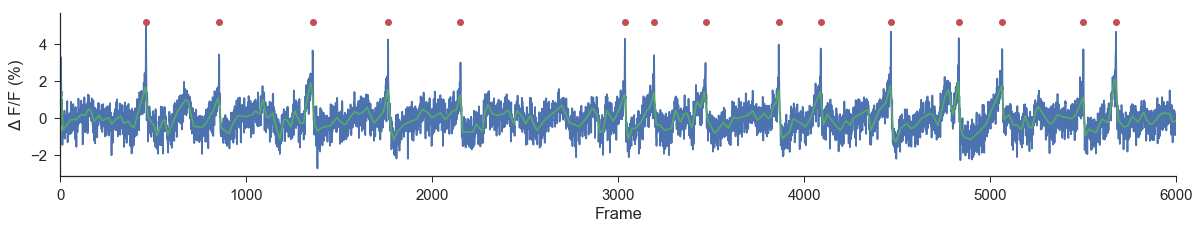

In [30]:
plt.figure(figsize=(20, 3))
plt.plot(voltr_*50)
plt.plot(np.asarray(denoised_voltr_)*50)
plot_spks(plt, spk_, 5.2, label='Detected spike time')
plt.ylabel(r'$\Delta$ F/F (%)')
plt.xlabel('Frame')
plt.xlim([0, 6000])
# plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1))
sns.despine()
# plt.savefig('tmpFigures/example_cell_voltron_sub.eps')

### 3.3 For all cells

/groups/ahrens/home/weiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: CPS line search stalled. Returning best solution found.
  # Remove the CWD from sys.path while we load stuff.
/groups/ahrens/home/weiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: CPS line search stalled. Returning best solution found.
/groups/ahrens/home/weiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: CPS line search stalled. Returning best solution found.
  # Remove the CWD from sys.path while we load stuff.
/groups/ahrens/home/weiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: CPS line search stalled. Returning best solution found.
/groups/ahrens/home/weiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: CPS line search stalled. Returning best solution found.
  # Remove the CWD from sys.path while we load stuff.
/groups/ahrens/home/weiz/anaconda3/lib/python3.6

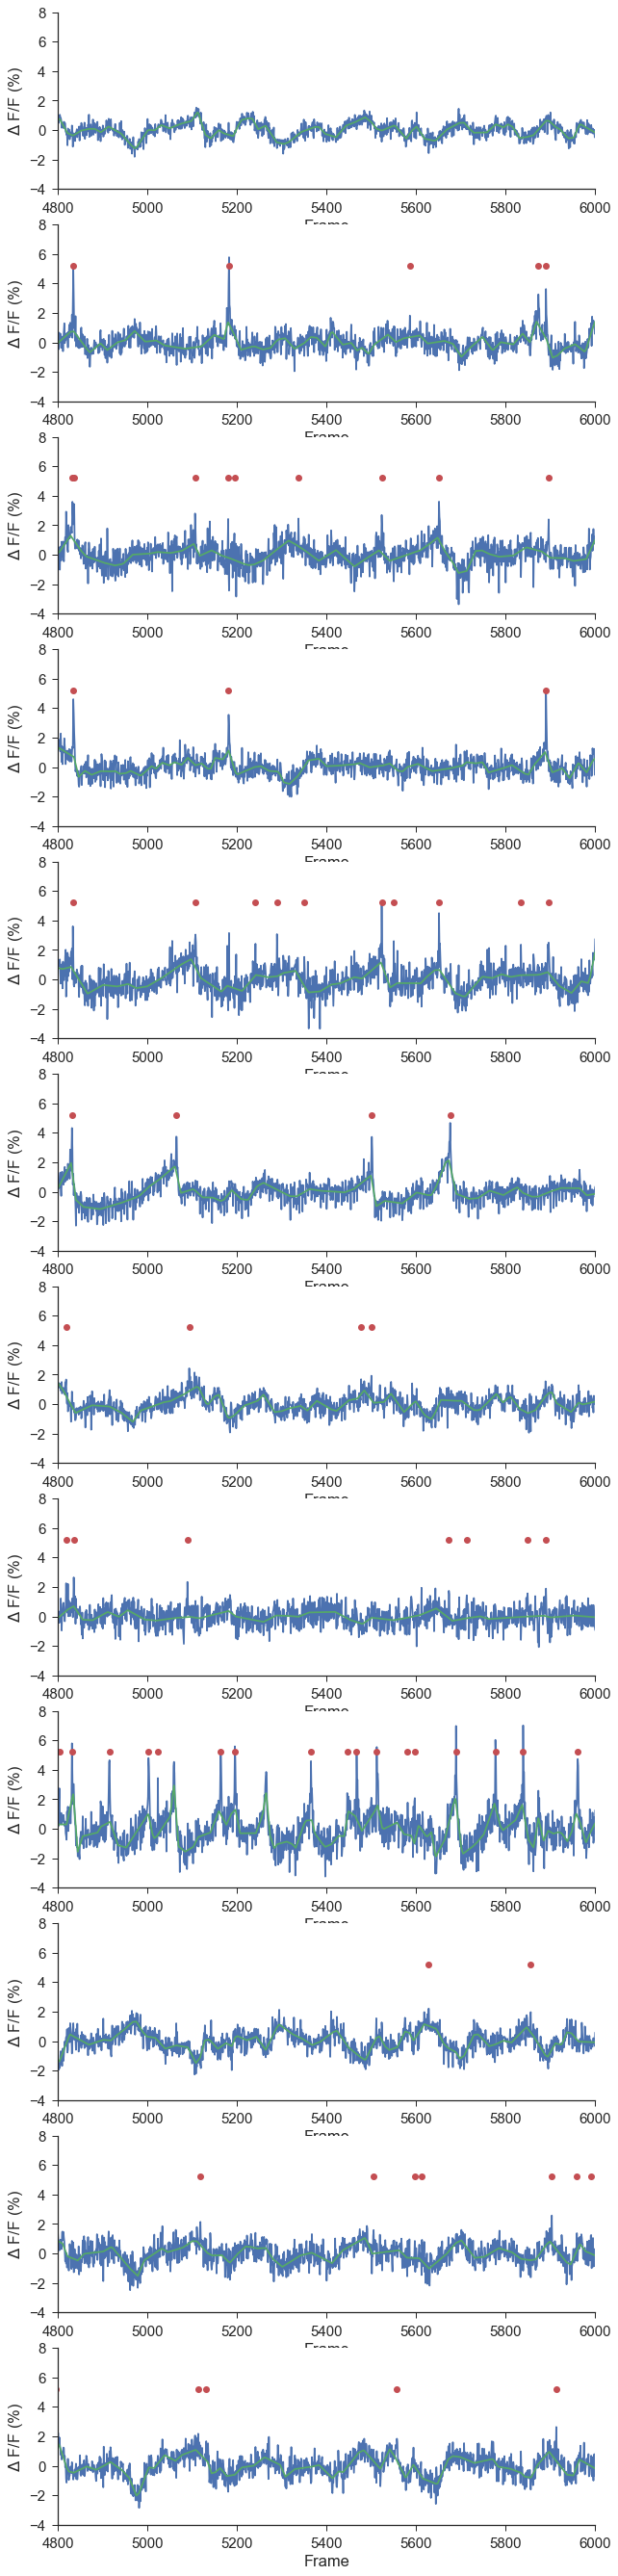

In [54]:
voltrs = C_/C_.mean(axis=-1, keepdims=True)-1
div_list = np.array([45, 45, 25, 42, 38, 50, 42, 30, 50, 140, 40, 400])
voltrs = voltrs/div_list[:, np.newaxis]

fig, ax = plt.subplots(len(voltrs), 1, figsize=(10, 4*len(voltrs)))
ax = ax.flatten()

for n, voltr_ in enumerate(voltrs):
    filters = TrendFilter(voltr_.shape[-1])
    denoised_voltr = filters.denoise(voltr_)
    spk = np.zeros(voltr_.shape)
    x_, contain_outliers_ = prepare_sequences(voltr_, spk, window_length)
    spk_ = detected_peak_spikes(m, x_, voltr_, thres=0.85, devoltr_ = denoised_voltr, 
                                peakThres=.9, peak_minDist=10, smallPeakThres = 40)
    tspk = np.where(spk_>0)[0]
    tspk_win = tspk[:, None] + np.arange(-3, 3)[None, :]
    tspk_win = tspk_win.reshape(-1)
    nospike = np.zeros(spk_.shape)
    nospike[tspk_win] = 1
    tspk_ = np.where(nospike==0)[0]
    int_voltr_ = voltr_.copy()
    int_voltr_[tspk_win] = np.interp(tspk_win, tspk_, voltr_[tspk_])
    denoised_voltr_ = filters.denoise(int_voltr_)
    
    ax[n].plot(voltr_*50)
    ax[n].plot(np.asarray(denoised_voltr_)*50)
    if spk_.sum()>0:
        plot_spks(ax[n], spk_, 5.2, label='Detected spike time')
    ax[n].set_ylabel(r'$\Delta$ F/F (%)')
    ax[n].set_xlabel('Frame')
    ax[n].set_xlim([4800, 6000])
    ax[n].set_ylim([-4, 8])
    sns.despine()
plt.savefig('tmpFigures/example_cell_voltron_sub_all_cells_short.eps')

## 4. Check with behaviors

In [32]:
folderName = '/groups/ahrens/ahrenslab/Takashi/toZiqiang/02212018Fish2-1/'

In [33]:
swim_L = np.load(folderName+'swim_L.npy')
swim_R = np.load(folderName+'swim_R.npy')
frame = np.load(folderName+'frame.npy')

In [42]:
from skimage import io
imgFileName = 'Raw_stack.tif'
imgStack = io.imread(folderName+imgFileName)
imgStack.shape

(6001, 204, 384)

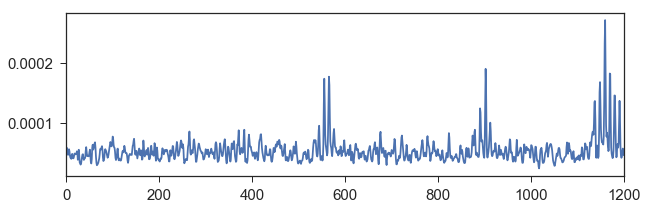

In [55]:
plt.figure(figsize=(10, 3))
# plt.plot(swim_L[frame[24000:30001]])
plt.plot(swim_R[frame[24000:30001]][-1200:])
plt.xlim([0, 1200])
plt.savefig('tmpFigures/example_cell_ephys_all_cells_short.eps')